# Soil Analysis

## Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import os
from scipy import stats
from tabulate import tabulate
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from simple_colors import *
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [181]:
soil_nutrient_df = pd.read_csv('Soil Nutrient Composition.csv', index_col='Sample ID.')
soil_particle_df = pd.read_csv('Soil particle analysis.csv', index_col='PARTICLE SIZE ANALYSIS')

In [182]:
soil_nutrient_df.columns = soil_nutrient_df.columns.str.strip()
soil_particle_df.columns = soil_particle_df.columns.str.strip()


## Data Normalization

In [158]:
numerical_cols = soil_nutrient_df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
soil_nutrient_df[numerical_cols] = scaler.fit_transform(soil_nutrient_df[numerical_cols])
soil_nutrient_df.head()


,sand,silt,clay,Tex. Class,pH H2O; 1:1,pH KCl,EC,absorbance,ppm(graph),Available P,...,Ex. Ca,Ex. Mg,Ex. Na,Ex. K,Ex. Zn,Ex. Cu,Ex. Mn,Ex. Fe,ECEC,%BS
Sample ID.,,,,,,,,,,,,,,,,,,,,,
011(27-41),0.500000,0.857143,0.272727,SANDY LOAM,0.302632,0.345029,0.169683,0.159159,0.159159,0.159159,...,0.195333,0.120611,0.103896,0.167401,0.016529,0.838863,0.238245,0.307818,0.096398,0.502497
2,0.833333,0.428571,0.000000,LOAMY SAND,0.118421,0.140351,0.095023,0.120120,0.120120,0.120120,...,0.146067,0.520611,1.000000,0.491189,0.363636,0.540284,0.539185,0.190554,1.000000,0.953499
17,0.611111,0.857143,0.090909,LOAMY SAND,0.190789,0.140351,0.581448,0.000000,0.000000,0.000000,...,0.445117,0.677863,0.068182,0.259912,0.760331,1.000000,0.454545,0.169381,0.344905,0.871874
013(11-30),0.555556,0.857143,0.181818,SANDY LOAM,0.302632,0.181287,0.000000,0.048048,0.048048,0.048048,...,0.051858,0.206107,0.058442,0.000000,0.421488,0.417062,0.094044,0.488599,0.006835,0.737787
8,0.833333,0.428571,0.000000,LOAMY SAND,0.151316,0.000000,0.033937,0.102102,0.102102,0.102102,...,0.079516,0.265649,0.915584,0.535242,0.396694,0.018957,0.322884,0.171010,0.825032,0.869605


## Descriptive Statistics

In [46]:
# Descriptive statistics
soil_nutrient_desc = soil_nutrient_df.describe()
soil_particle_desc = soil_particle_df.describe()

print("\nSoil Nutrient Composition Descriptive Statistics:\n")
soil_nutrient_desc
print("\nSoil Particle Analysis Descriptive Statistics:\n")
soil_particle_desc



Soil Nutrient Composition Descriptive Statistics:


Soil Particle Analysis Descriptive Statistics:



,SAND,SILT,CLAY
count,25.000000,25.00000,25.00000
mean,82.480000,9.76000,7.76000
std,8.761278,3.57398,6.17306
min,56.000000,4.00000,4.00000
25%,82.000000,8.00000,4.00000
50%,86.000000,10.00000,6.00000
75%,88.000000,10.00000,8.00000
max,92.000000,18.00000,26.00000


## Virtual Analysis

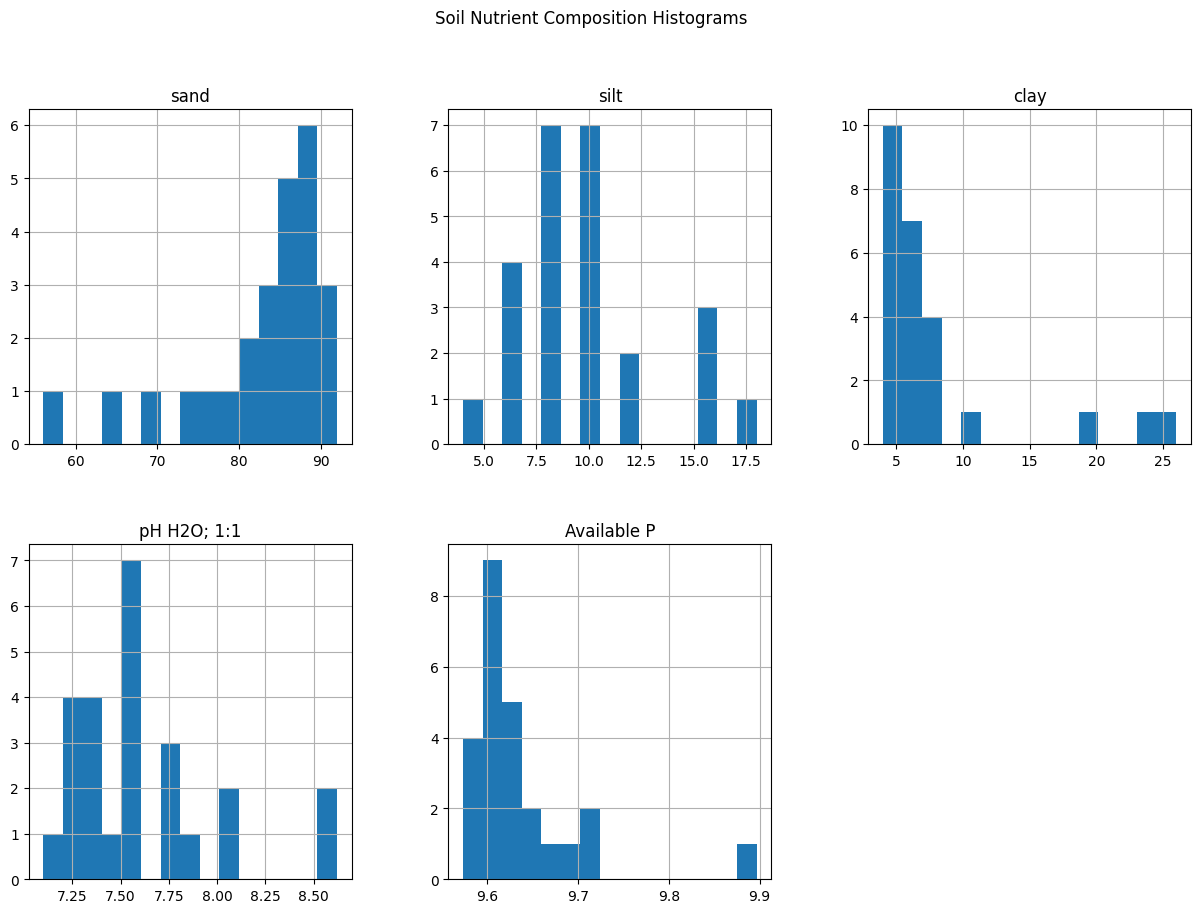

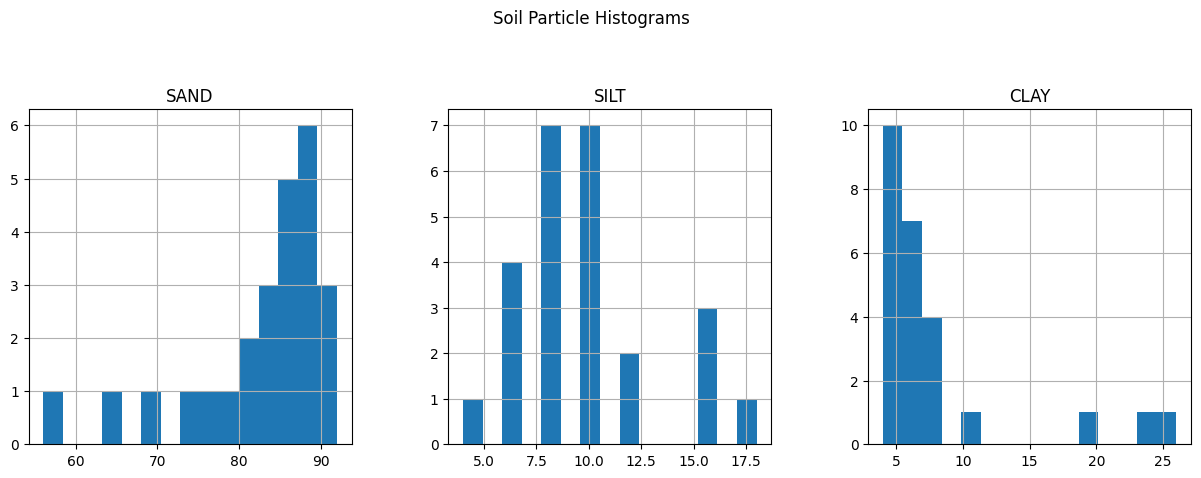

In [155]:
soil_nutrient_df[['sand', 'silt', 'clay', 'pH H2O; 1:1', 'Available P']].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Soil Nutrient Composition Histograms')
plt.show()

soil_particle_df.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Soil Particle Histograms')
plt.show()


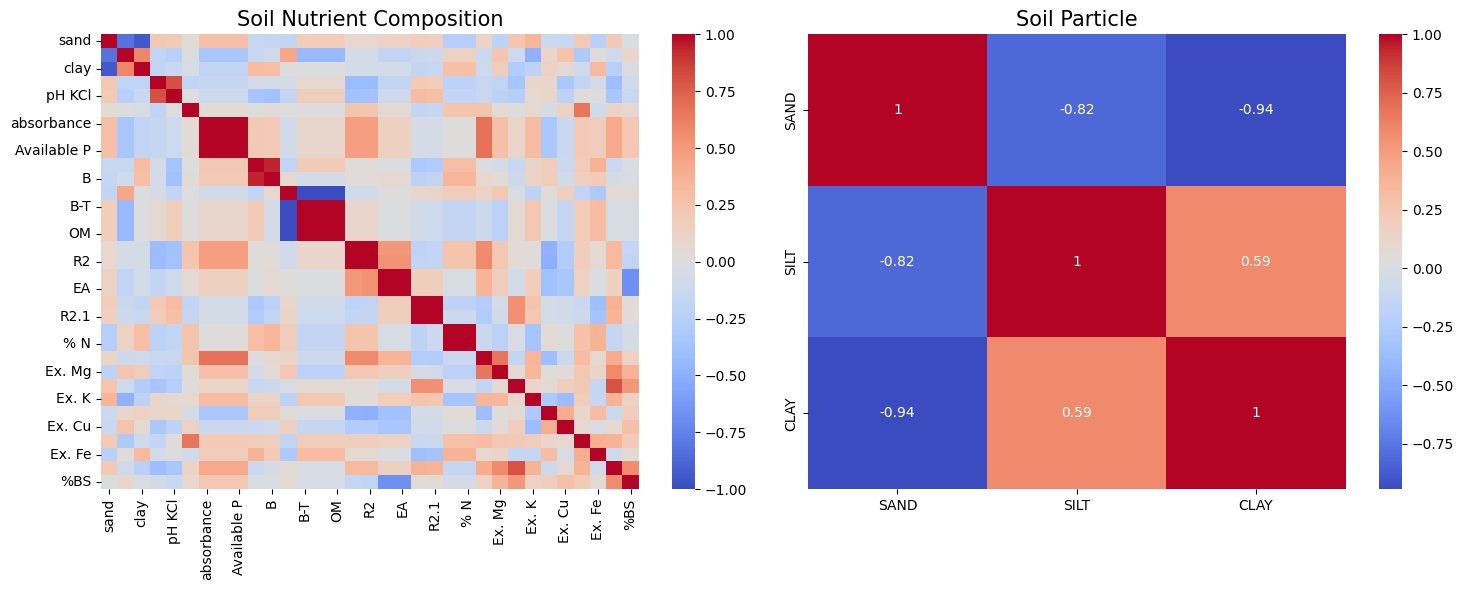

In [183]:
soil_nutrient_corr = soil_nutrient_df.drop('Tex. Class', axis = 1).corr()
soil_particle_corr = soil_particle_df.drop('Tex. Class', axis = 1).corr()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(soil_nutrient_corr, annot=False, cmap='coolwarm')
plt.title('Soil Nutrient Composition', fontsize = 15)

plt.subplot(1, 2, 2)
sns.heatmap(soil_particle_corr, annot=True, cmap='coolwarm')
plt.title('Soil Particle', fontsize = 15)

plt.tight_layout()

plt.show()


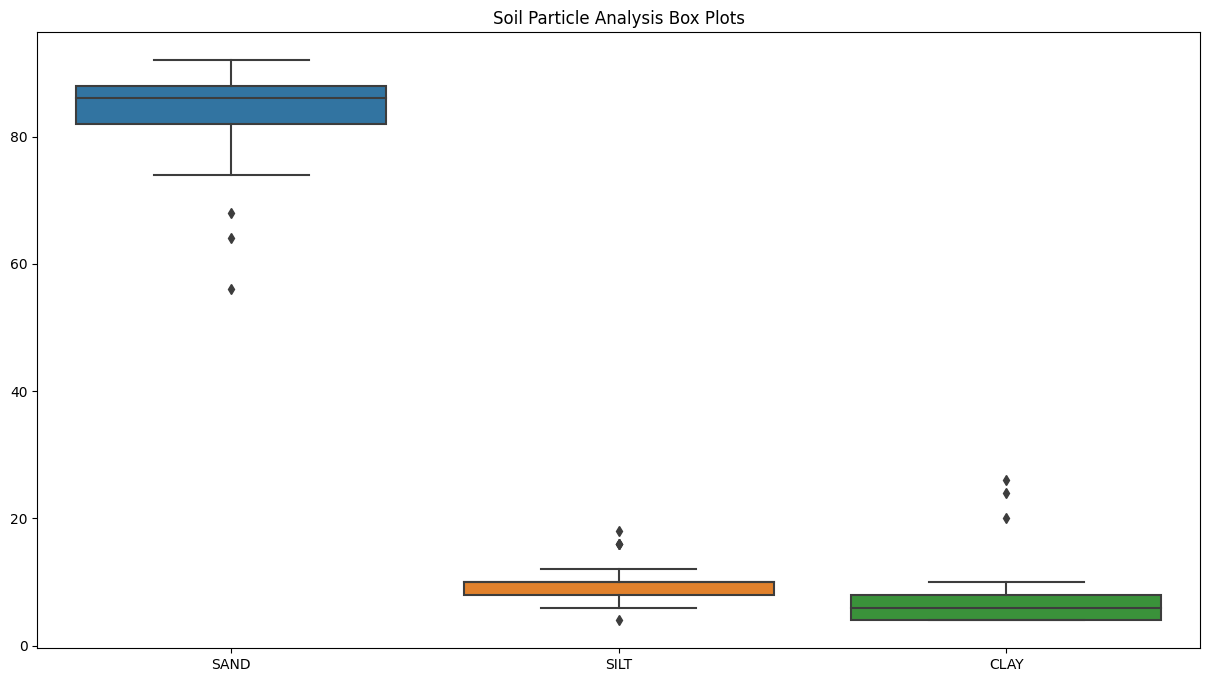

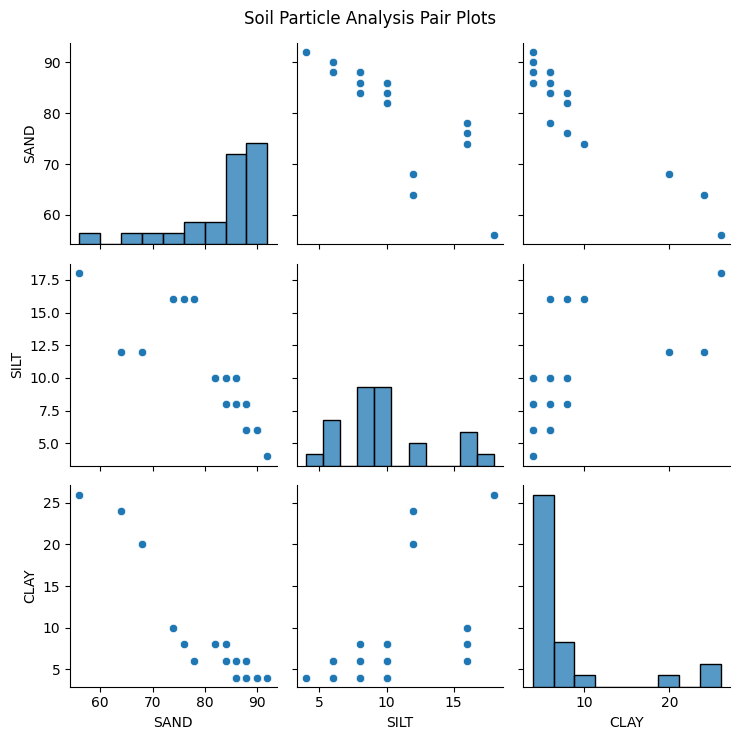

In [184]:
# Box plots for key variables
plt.figure(figsize=(15, 8))
sns.boxplot(data=soil_particle_df)
plt.title('Soil Particle Analysis Box Plots')
plt.show()

sns.pairplot(soil_particle_df)
plt.suptitle('Soil Particle Analysis Pair Plots')
plt.tight_layout()
plt.show()



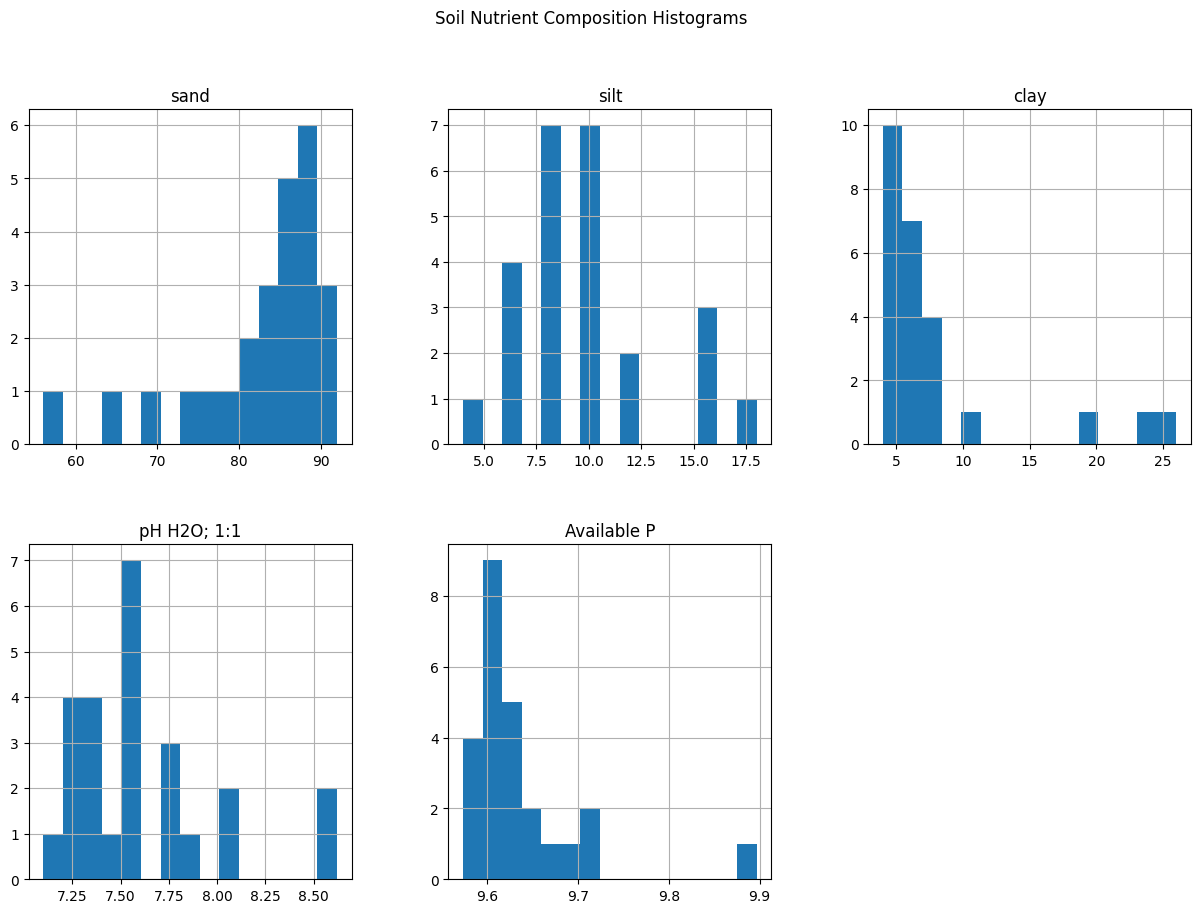

In [82]:
# Plot histograms for key variables
soil_nutrient_df[['sand', 'silt', 'clay', 'pH H2O; 1:1', 'Available P']].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Soil Nutrient Composition Histograms')
plt.show()

<Figure size 1500x1000 with 0 Axes>

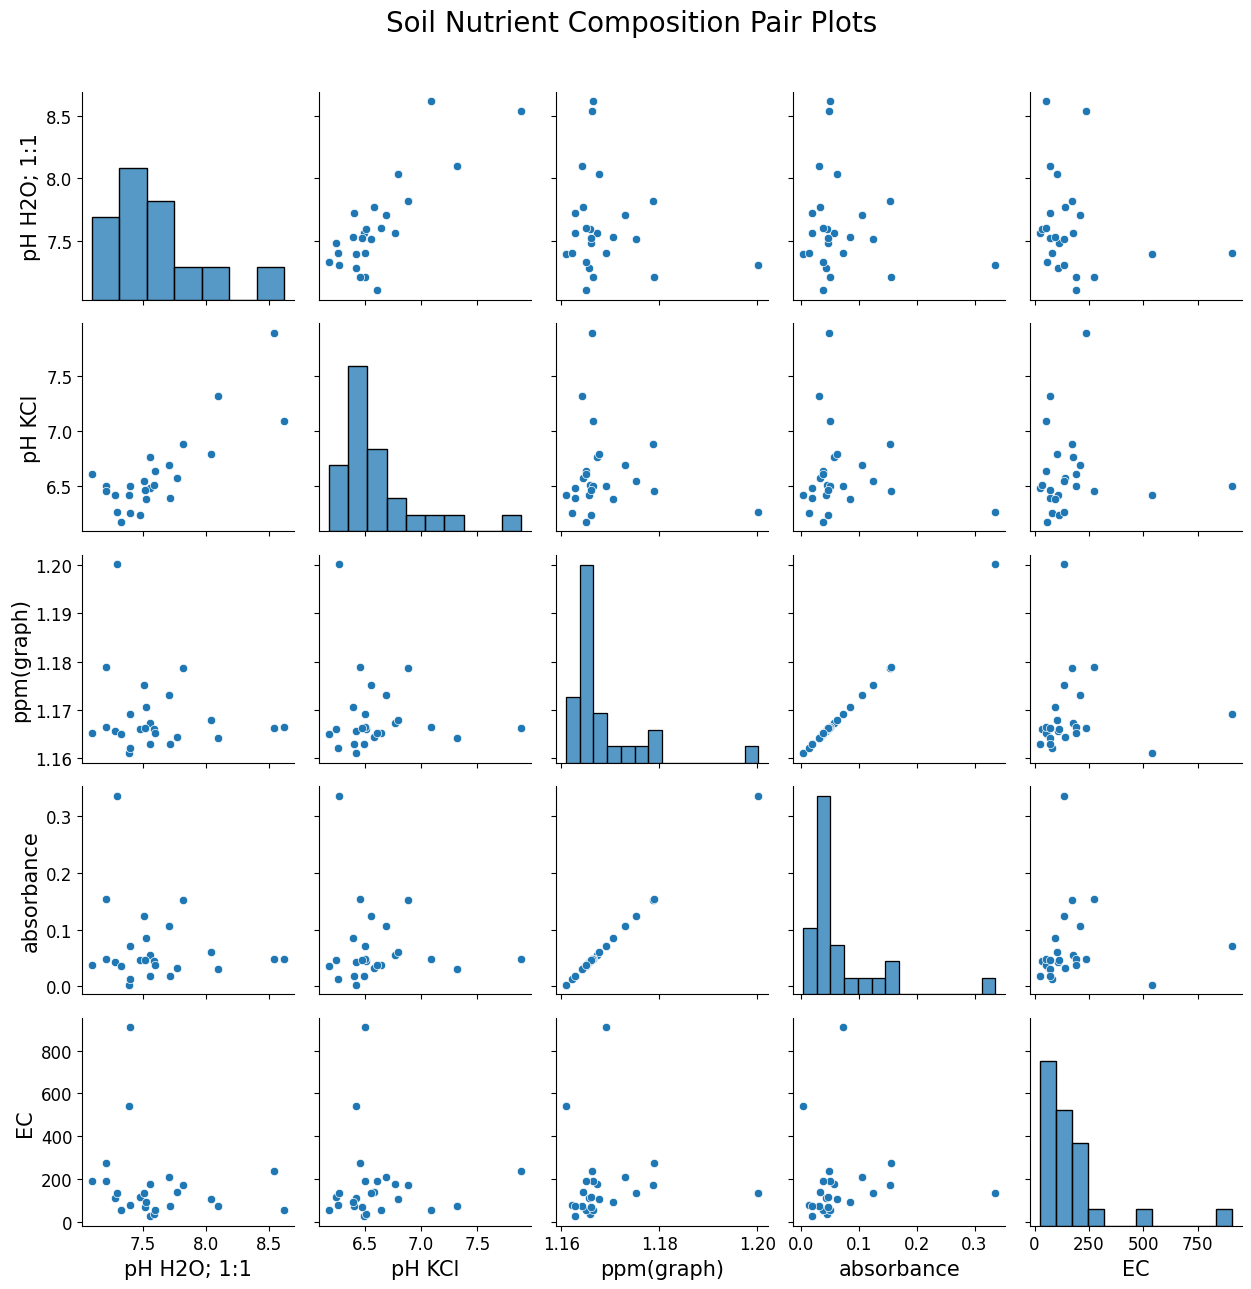

In [110]:
plt.figure (figsize= (15, 10))
pairplot = sns.pairplot(soil_nutrient_df[['pH H2O; 1:1', 'pH KCl','ppm(graph)', 'absorbance','EC']])
plt.suptitle('Soil Nutrient Composition Pair Plots', fontsize = 20, y = 1.02)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
# Adjust the font size of x and y labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
plt.show()

In [159]:
soil_class_counts = soil_nutrient_df['Tex. Class'].value_counts()
file_path = 'Table/soil_class_counts.csv'
soil_class_counts.to_csv(file_path, header=True)

soil_class_counts_df = soil_class_counts.reset_index()
soil_class_counts_df.columns = ['Tex. Class', 'Count']
table = tabulate(soil_class_counts_df, headers='keys', tablefmt='pretty')
print("Soil Class Distribution:")
print(table)

Soil Class Distribution:
+---+-----------------+-------+
|   |   Tex. Class    | Count |
+---+-----------------+-------+
| 0 |   LOAMY SAND    |  13   |
| 1 |      SAND       |   4   |
| 2 |   SANDY LOAM    |   3   |
| 3 | SAND/LOAMY SAND |   3   |
| 4 | SANDY CLAY LOAM |   2   |
+---+-----------------+-------+


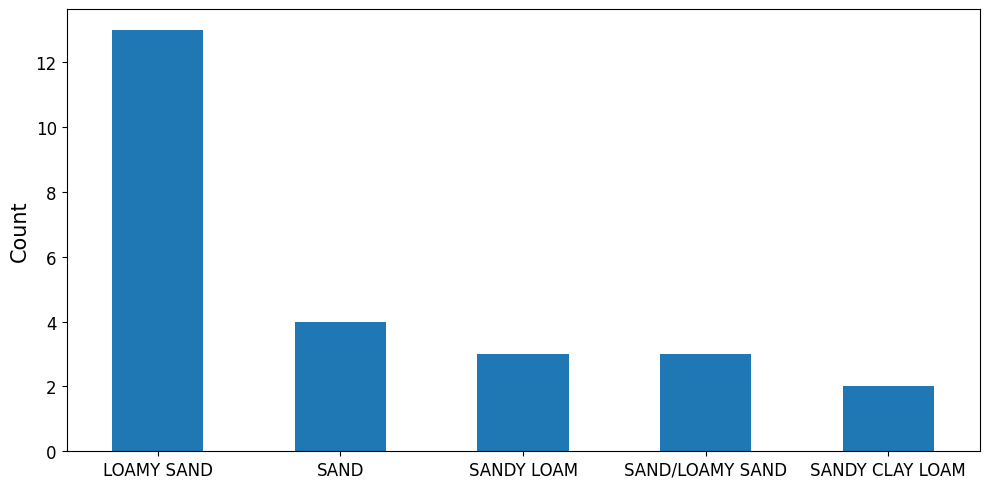

In [139]:
plt.figure(figsize=(10, 5))
soil_class_counts.plot(kind='bar', )
#plt.title('Distribution of Soil Classes', fontsize=20)
plt.xlabel('', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [12]:
soil_class_stats = soil_nutrient_df.groupby('Tex. Class').describe()
soil_class_stats


sand                                                     \
                count       mean       std   min   25%   50%   75%   max   
Tex. Class                                                                 
LOAMY SAND       13.0  84.615385  2.754949  78.0  84.0  86.0  86.0  88.0   
SAND              4.0  90.000000  1.632993  88.0  89.5  90.0  90.5  92.0   
SAND/LOAMY SAND   3.0  88.000000  0.000000  88.0  88.0  88.0  88.0  88.0   
SANDY CLAY LOAM   2.0  60.000000  5.656854  56.0  58.0  60.0  62.0  64.0   
SANDY LOAM        3.0  72.666667  4.163332  68.0  71.0  74.0  75.0  76.0   

                 silt             ...      ECEC              %BS             \
                count       mean  ...       75%        max count       mean   
Tex. Class                        ...                                         
LOAMY SAND       13.0   9.384615  ...  7.712311  11.579149  13.0  94.519069   
SAND              4.0   6.000000  ...  4.861094   5.888338   4.0  93.502342   
SAND/LOAMY SAND   3.0   8.000000  ...  9.751927   9.903431   3.0  95.634719   
SANDY CLAY LOAM   2.0  15.000000  ...  5.488415   5.784586   2.0  94.714323   
SANDY LOAM        3.0  14.666667  ...  4.875598   5.295716   3.0  94.468544   

                                                                       \
                      std        min        25%        50%        75%   
Tex. Class                                                              
LOAMY SAND       2.561705  89.407894  93.098856  95.125310  96.219220   
SAND             3.073183  90.262643  91.451882  93.273511  95.323972   
SAND/LOAMY SAND  2.706502  92.673493  94.461829  96.250165  97.115331   
SANDY CLAY LOAM  1.326192  93.776564  94.245443  94.714323  95.183203   
SANDY LOAM       1.101401  93.715605  93.836492  93.957380  94.845014   

                            
                       max  
Tex. Class                  
LOAMY SAND       97.581860  
SAND             97.199705  
SAND/LOAMY SAND  97.980498  
SANDY CLAY LOAM  95.652082  
SANDY LOAM       95.732649  

[5 rows x 264 columns]

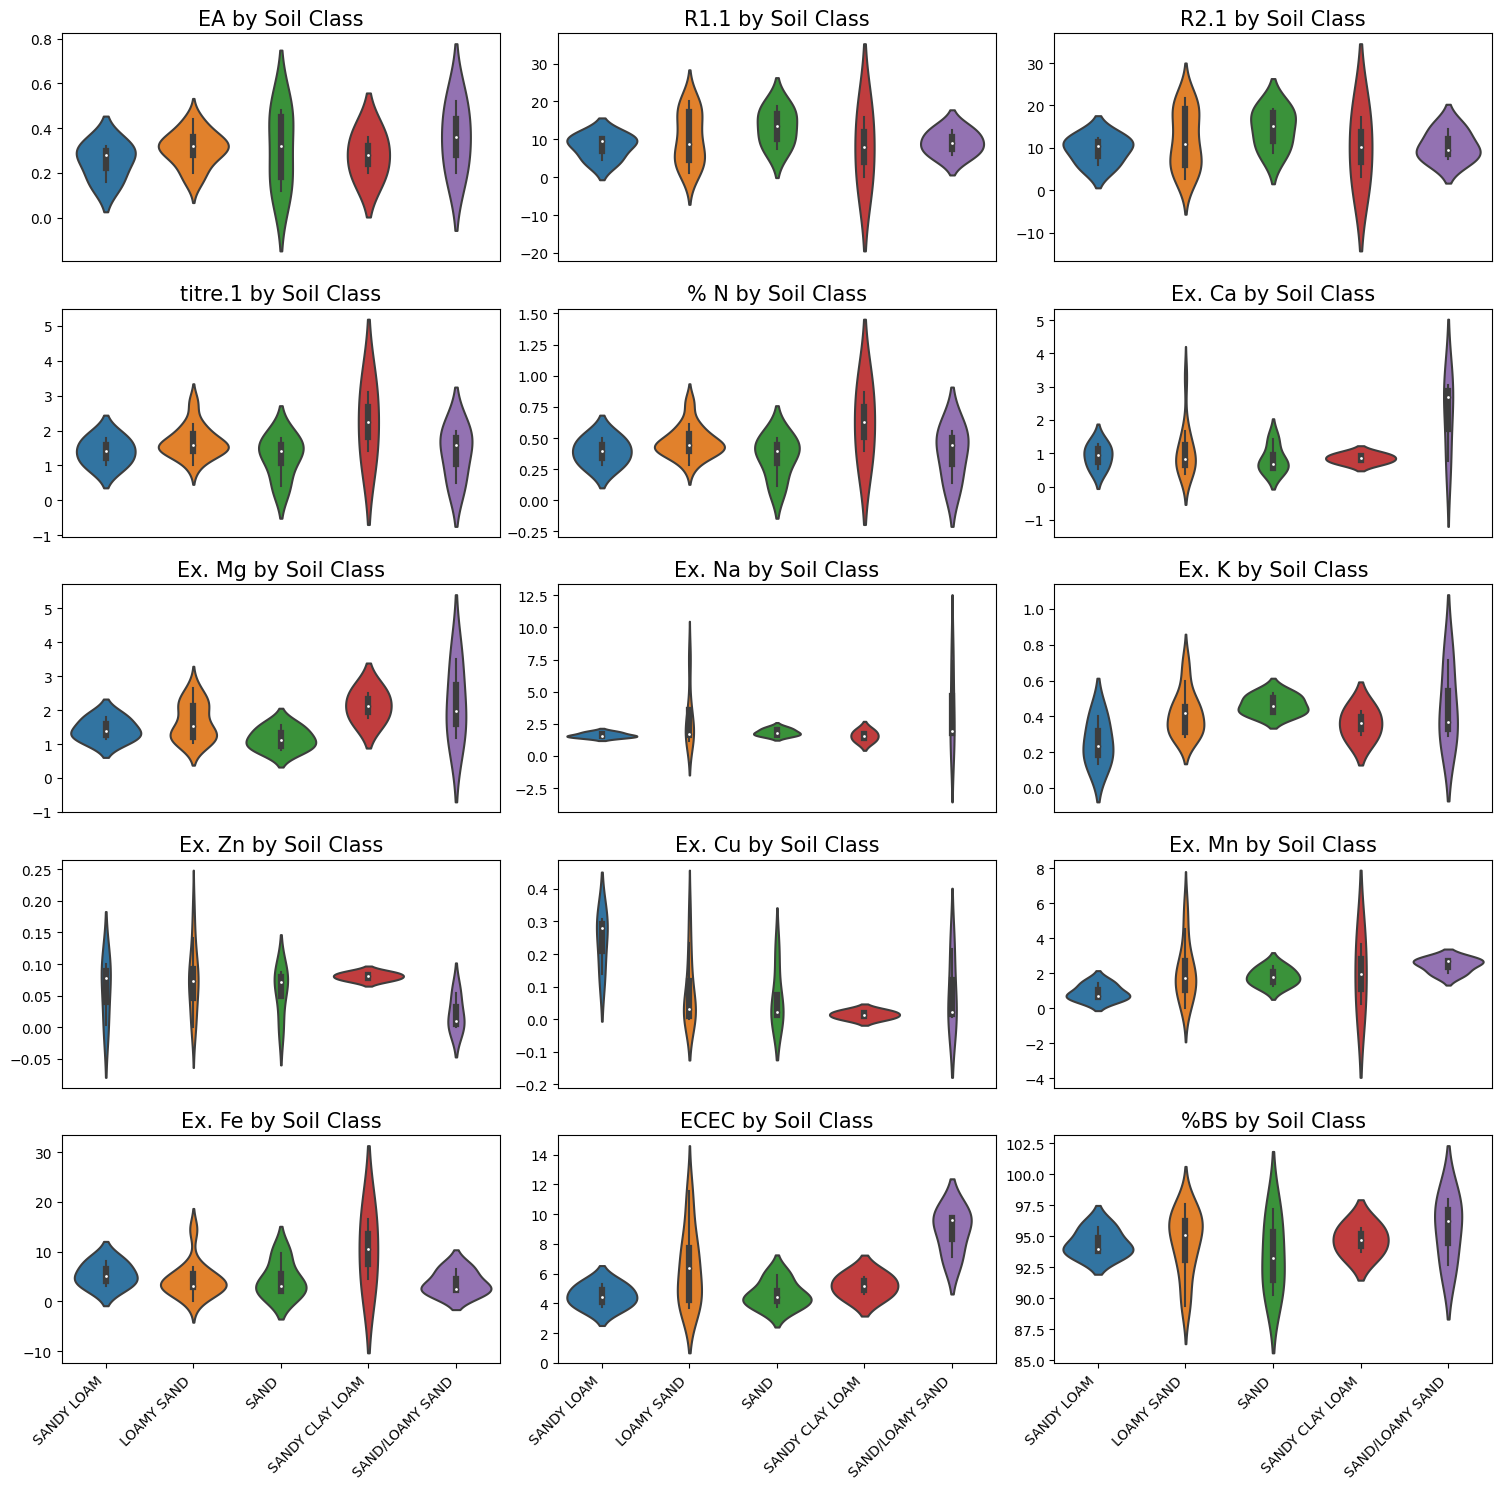

In [242]:
columns_to_plot = soil_nutrient_df.columns[19:]

num_plots = len(columns_to_plot)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 15))

for idx, col in enumerate(columns_to_plot):
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.violinplot(x='Tex. Class', y=col, data=soil_nutrient_df, ax=ax)
    plt.title(f'{col} by Soil Class', fontsize=15)
    plt.xticks(rotation = 45)
    plt.xlabel('')
    plt.ylabel('', fontsize=12)
        if idx >= (num_plots - num_cols):  
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
    else:
        ax.set_xlabel('')  
        ax.set_xticks([])  

plt.tight_layout()
plt.show()

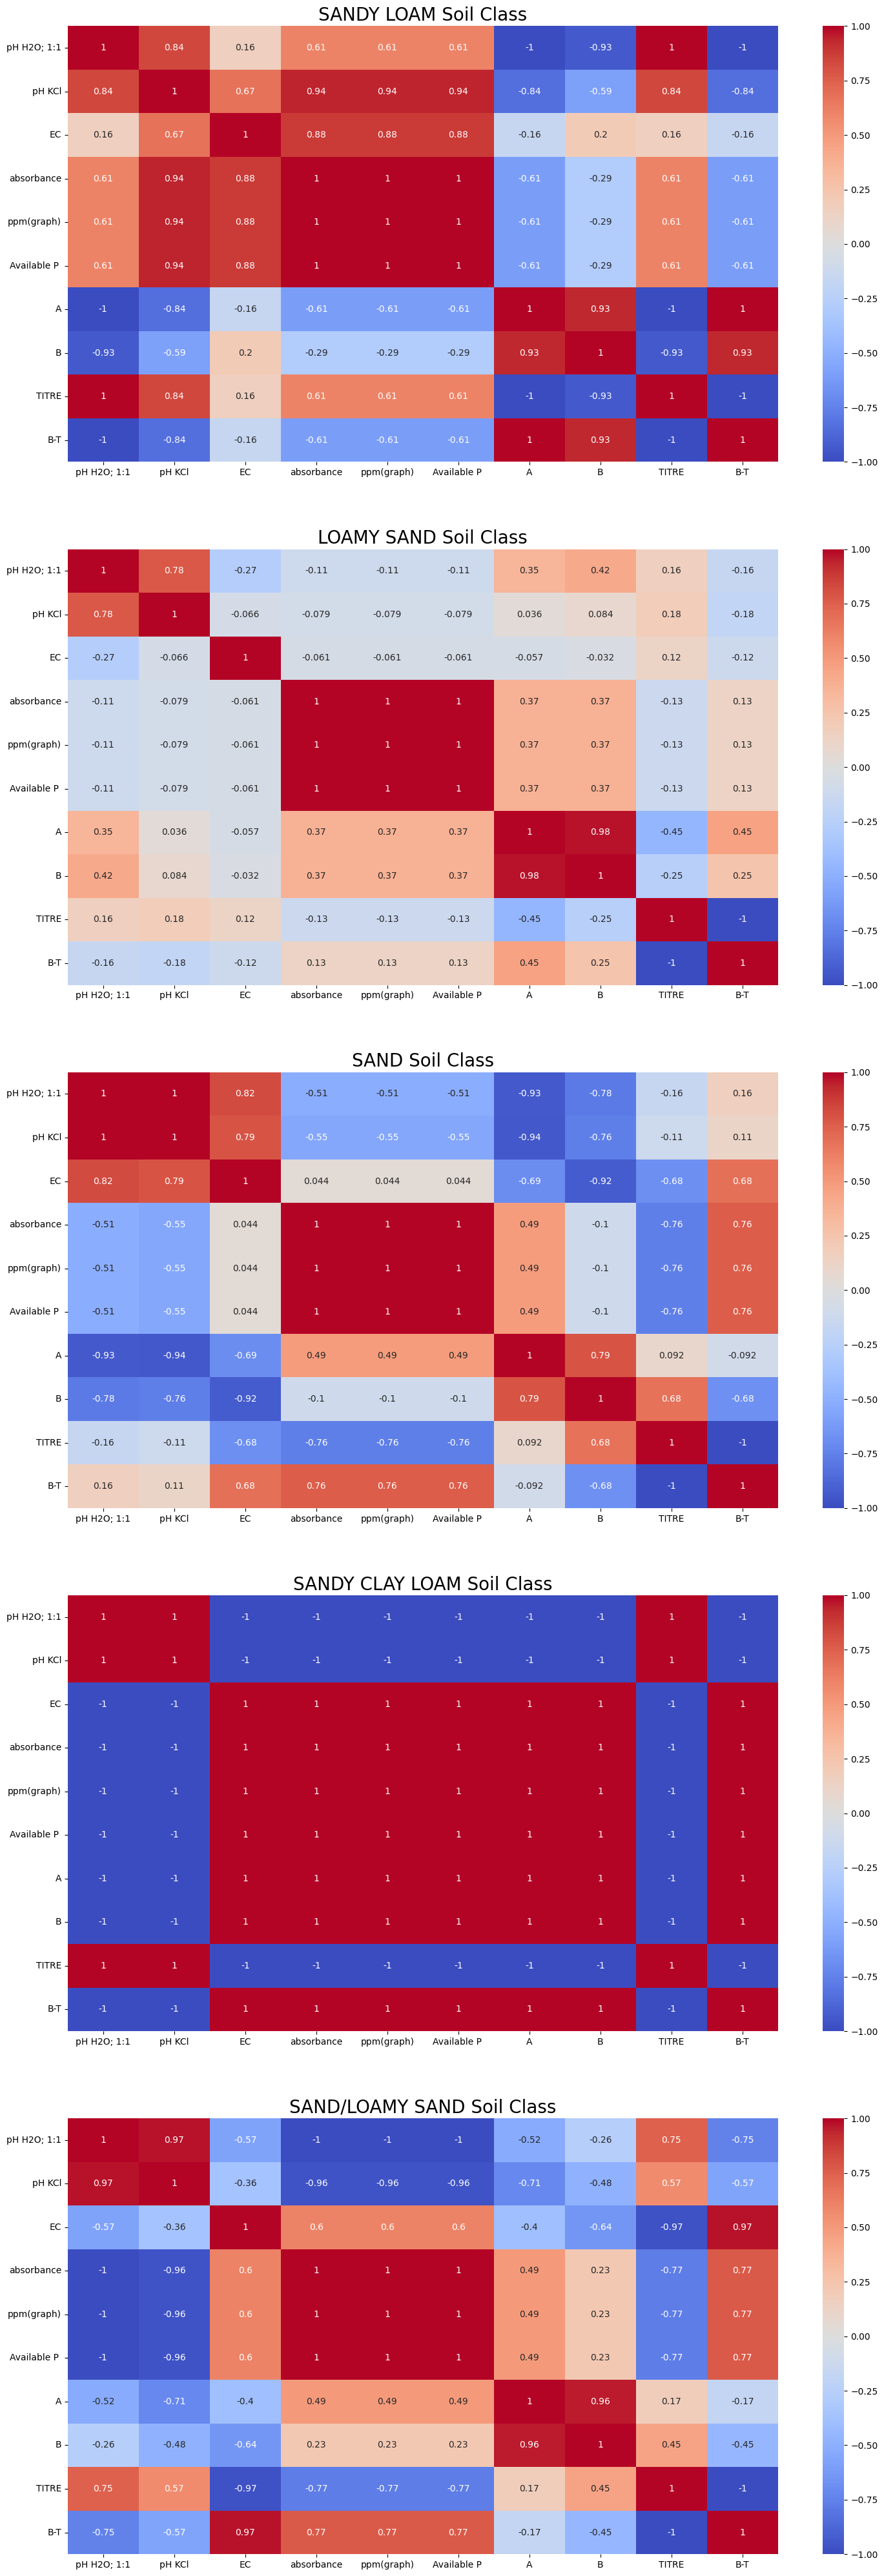

In [175]:
soil_classes = soil_nutrient_df['Tex. Class'].unique()
fig, axes = plt.subplots(len(soil_classes), 1, figsize=(15, len(soil_classes) * 8))

for idx, soil_class in enumerate(soil_classes):
    class_df = soil_nutrient_df[soil_nutrient_df['Tex. Class'] == soil_class]

    class_df_numerical = class_df.select_dtypes(include=['float64', 'int64'])
    class_corr = class_df_numerical.iloc[:, 3:-20].corr()

    sns.heatmap(class_corr, annot=True, cmap='coolwarm', ax=axes[idx])
    axes[idx].set_title(f'{soil_class} Soil Class', fontsize = 20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
